<a href="https://colab.research.google.com/github/sonicfsw/Check_ULP-R-_722-1/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Содержание практики

1. Скачиваем данные - 20 новостных групп
2. Изучаем TF-IDF и получение TF-IDF-векторов текстов
3. Получение векторов с помощью языковой модели
4. Ищем оптимальное число кластеров для обоих вариантов векторов
5. Кластеризуем оба набора векторов
6. Сравниваем метрики и визуализируем кластеры

# Скачиваем датасет

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "comp.graphics",
    "sci.space",
    'rec.motorcycles',
    'sci.med',
    'rec.sport.baseball'
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target

In [ ]:
df = pd.DataFrame()
df['text'] = dataset.data
df['target'] = [categories[x] for x in labels]

In [ ]:
df.head()

,text,target
0,"\n {Description of ""External Tank"" option for SSF redesign deleted}\n\n\nYo Ken, let's keep on-top of things! Both the ""External Tank"" and\n""Wingless Orbiter"" options have been deleted from the SSF redesign\noptions list. Today's (4/23) edition of the New York Times reports\nthat O'Connor told the panel that some redesign proposals have\nbeen dropped, such as using the ""giant external fuel tanks used\nin launching space shuttles,"" and building a ""station around\nan existing space shuttle with its wings and tail removed.""\n\nCurrently, there are three options being considered, as presented\nto the advisory panel meeting yesterday (and as reported in\ntoday's Times).\n\nOption ""A"" - Low Cost Modular Approach\nThis option is being studied by a team from MSFC. {As an aside,\nthere are SSF redesign teams at MSFC, JSC, and LaRC supporting\nthe SRT (Station Redesign Team) in Crystal City. Both LeRC and\nReston folks are also on-site at these locations, helping the respective\nteams with their redesign activities.} Key features of this\noption are:\n - Uses ""Bus-1"", a modular bus developed by Lockheed that's\n qualified for STS and ELV's. The bus provides propulsion, GN&C\n Communications, & Data Management. Lockheed developed this\n for the Air Force.\n - A ""Power Station Capability"" is obtained in 3 Shuttle Flights.\n SSF Solar arrays are used to provide 20 kW of power. The vehicle\n flies in an ""arrow mode"" to optimize the microgravity environment.\n Shuttle/Spacelab missions would utilize the vehilce as a power\n source for 30 day missions.\n - Human tended capability (as opposed to the old SSF sexist term\n of man-tended capability) is achieved by the addition of the\n US Common module. This is a modified version of the existing\n SSF Lab module (docking ports are added for the International\n Partners' labs, taking the place of the nodes on SSF). The\n Shuttle can be docked to the station for 60 day missions.\n The Orbiter would provide crew habitability & EVA capability.\n - International Human Tended. Add the NASDA & ESA modules, and\n add another 20 kW of power\n - Permanent Human Presence Capability. Add a 3rd power module,\n the U.S. habitation module, and an ACRV (Assured Crew Return\n Vehicle).\n\nOption ""B"" - Space Station Freedom Derived\nThe Option ""B"" team is based at LaRC, and is lead by Mike Griffin.\nThis option looks alot like the existing SSF design, which we\nhave all come to know and love :)\n\nThis option assumes a lightweight external tank is available for\nuse on all SSF assembly flights (so does option ""A""). Also, the \nnumber of flights is computed for a 51.6 inclination orbit,\nfor both options ""A"" and ""B"".\n\nThe build-up occurs in six phases:\n - Initial Research Capability reached after 3 flights. Power\n is transferred from the vehicle to the Orbiter/Spacelab, when\n it visits.\n - Man-Tended Capability (Griffin has not yet adopted non-sexist\n language) is achieved after 8 flights. The U.S. Lab is\n deployed, and 1 solar power module provides 20 kW of power.\n - Permanent Human Presence Capability occurs after 10 flights, by\n keeping one Orbiter on-orbit to use as an ACRV (so sometimes\n there would be two Orbiters on-orbit - the ACRV, and the\n second one that comes up for Logistics & Re-supply).\n - A ""Two Fault Tolerance Capability"" is achieved after 14 flights,\n with the addition of a 2nd power module, another thermal\n control system radiator, and more propulsion modules.\n - After 20 flights, the Internationals are on-board. More power,\n the Habitation module, and an ACRV are added to finish the\n assembly in 24 flights.\n\nMost of the systems currently on SSF are used as-is in this option, \nwith the exception of the data management system, which has major\nchanges.",rec.sport.baseball
1,They must be shipping that good Eau Clair acid to California now.,rec.sport.baseball
2,"I'm interested in this from the other angle: what antihistamine can I\nt

# Готовим датасет

In [ ]:
df.text = df.text.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True).replace(r'\t',  ' ', regex=True)

# TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) — это статистическая мера, используемая для оценки важности термина в документе относительно множества документов (или корпуса). Этот метод часто применяется в задачах информационного поиска, текстовой аналитики и машинного обучения для работы с текстом.

TF-IDF состоит из двух основных компонентов:

1. TF (Term Frequency) — частота термина в документе.
2. IDF (Inverse Document Frequency) — обратная частота документа.

TF измеряет, как часто термин встречается в данном документе. Чем больше термин встречается в документе, тем больше его вес. Однако это не абсолютная частота, а относительная, чтобы нормализовать тексты разной длины.

$$ TF = \frac{f(t,d)} {N}$$

* $f(t,d)$ — количество вхождений слова $t$ в документе $d$
* $N$ — количесто слов в документе $d$

IDF измеряет важность термина во всем корпусе документов. Чем реже встречается термин в разных документах, тем выше его значимость.

$$ IDF(t) = log \frac{D}{1 + df(t)}$$

* $D$ — число документов в коллекции
* $df(t)$ — количество документов, в которых встречается слово $t$

https://miro.medium.com/v2/resize:fit:816/1*1pTLnoOPJKKcKIcRi3q0WA.jpeg

* Если термин часто встречается в документе, но редко встречается в других документах, его значение будет высоким.
* Если термин встречается часто во многих документах, его важность будет понижена (его IDF будет маленьким).
* TF-IDF помогает отсеять часто встречающиеся "общие" слова (например, предлоги, союзы), при этом подчеркивая важные для конкретного документа термины.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Создаем объект TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=300)

# Преобразуем тексты в TF-IDF матрицу
tfidf_matrix = vectorizer.fit_transform(df.text)

# Получаем список всех терминов
terms = vectorizer.get_feature_names_out()

# Преобразуем разреженную матрицу в DataFrame для удобства
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

In [ ]:
tfidf_df

,00,10,11,12,15,1993,20,24,30,able,...,with,without,won,work,world,would,year,years,you,your
0,0.0,0.043341,0.0,0.0,0.0,0.0,0.184463,0.051054,0.048261,0.0,...,0.087404,0.0,0.000000,0.0,0.0,0.077716,0.0,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.249832,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.273175,0.0,0.0,0.000000,0.0,0.0,0.118070,0.171797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.286142,0.0,0.0,0.0,0.0,0.000000,0.000000,0.159310,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.134924,0.098160
5735,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.218447,0.0,0.000000,0.0,0.0,0.086326,0.0,0.0,0.000000,0.000000
5736,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.153074,0.111365
5737,0.0,0.067222,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.135563,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


* TfidfVectorizer() — создается объект класса TfidfVectorizer. По умолчанию он автоматически токенизирует текст (разделяет его на слова), удаляет стоп-слова (например, "на", "и") и приводит текст к нижнему регистру.

* fit_transform(documents) — обучает модель на предоставленных документах и одновременно преобразует их в матрицу TF-IDF значений.

* get_feature_names_out() — возвращает список всех уникальных терминов (слов), которые были использованы для создания TF-IDF матрицы.

* toarray() — преобразует разреженную матрицу TF-IDF в массив, который удобнее визуализировать.

# Готовые языковые модели

In [ ]:
!pip install sentence-transformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 14.2 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings_df = pd.DataFrame()
embeddings_df['embeddings'] = df['text'].apply(lambda text: model.encode(text, convert_to_numpy=True).flatten())

# Понижение размерности с помощью UMAP

После создания эмбеддингов наших текстов можно заметить, что размерность данных большая: в зависимости от выбранной модели может составлять и 384 компонента вектора, и 768 или больше. После TF-IDF — 300.

Для сокращения размерности можно использовать UMAP с сохранением как можно большего количества информации.

In [ ]:
!pip install umap-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
from umap import UMAP

# Создаем объект класса UMAP
reducer = UMAP(n_neighbors=15,
               n_components=3,
               metric='cosine'
              )

## Для TD-IDF матрицы

In [ ]:
# Получение эмбеддингов
tf_idf_reduced = reducer.fit_transform(tfidf_matrix.toarray())

## Для эмбеддингов

In [ ]:
# Вынесение в отдельную переменную эмбеддингов
X = np.vstack(embeddings_df['embeddings'])

In [ ]:
# Получение эмбеддингов
embeddings = reducer.fit_transform(X)

# Нахождение оптимального числа кластеров

Перед непосредственно кластеризацией необходимо прикинуть количество кластеров, которое выделяют алгоритмы, а не основываясь на оригинальной разметке (при ее наличии). Делать можно с помощью коэффициента силуэта.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Задаем диапазон количества кластеров для итерации
MIN_CLUSTERS = 3
MAX_CLUSTERS = 15

def plot_silhouette(values):
  # Список для хранения значений индекса силуэта
  silhouette_scores = []
  # Проходим по различным значениям количества кластеров и вычисляем индекс силуэта
  for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):
      kmeans = KMeans(n_clusters=n_clusters, random_state=42)
      cluster_labels = kmeans.fit_predict(values)
      silhouette_avg = silhouette_score(values, cluster_labels)
      silhouette_scores.append(silhouette_avg)
      print(n_clusters)

  # Визуализация результатов
  plt.figure(figsize=(8, 6))
  plt.plot(range(MIN_CLUSTERS, MAX_CLUSTERS + 1), silhouette_scores, marker='o')
  plt.xlabel('Количество кластеров')
  plt.ylabel('Индекс силуэта')
  plt.title('Метод локтя для определения оптимального количества кластеров')
  plt.show()

## Для TF-IDF

Локальные максимумы — на 3-х и 6-ти кластерах. Однако из-за того, что данные часто хорошо группируются в малые (2-3 кластера) группы, можно рассматривать и другие варианты.

3
4
5
6
7
8
9
10
11
12
13
14
15


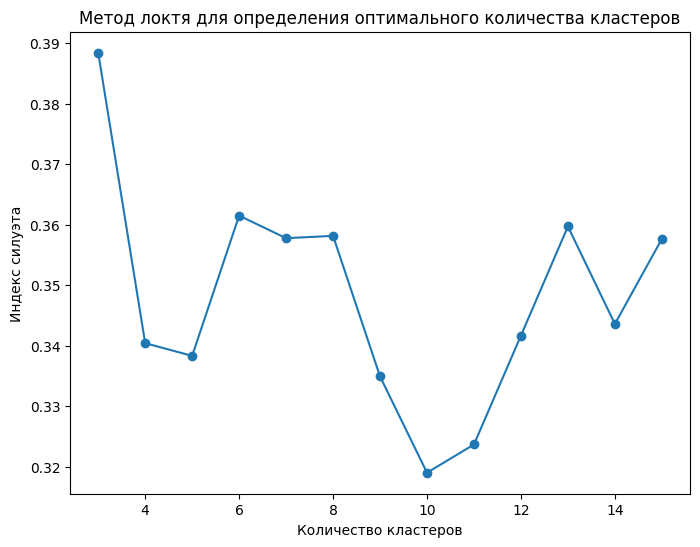

In [ ]:
plot_silhouette(tf_idf_reduced)

## Для эмбеддингов

Локальный максимум — 7 кластеров.

3
4
5
6
7
8
9
10
11
12
13
14
15


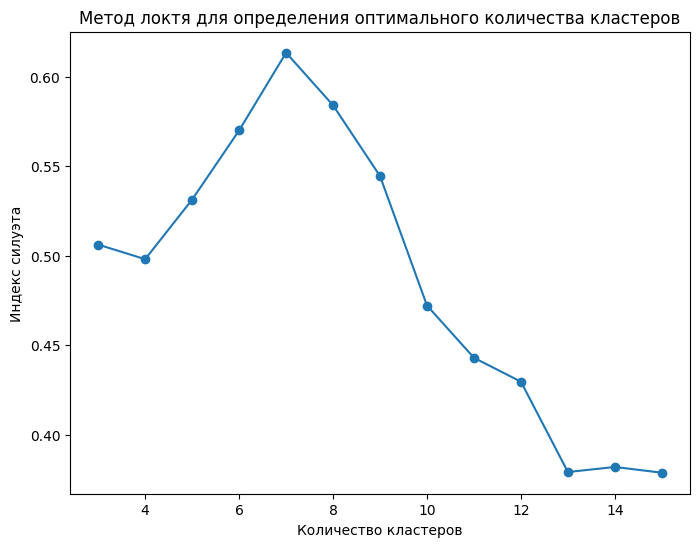

In [ ]:
plot_silhouette(embeddings)

# Кластеризация с помощью K-Means

In [ ]:
from sklearn.cluster import KMeans

def cluster(cluster_num: int, values_to_cluster):

  # clustering, here we set 5 clusters, i.e. 5 topics
  kmeans = KMeans(cluster_num)
  predictions = kmeans.fit_predict(values_to_cluster)

  return predictions

## Для TF-IDF

In [ ]:
tf_idf_preds = cluster(6, tf_idf_reduced)

## Для эмбеддингов

In [ ]:
embeds_preds = cluster(7, embeddings)

# Метрики

**Внутренние метрики**:

* Индекс силуэта: значения варьируются от -1 до 1. Чем ближе к 1, тем лучше кластеризация. Значение около 0 указывает на перекрытие кластеров, а отрицательные значения говорят о неправильно определённых кластерах.

* Индекс Дэвиса-Болдина: измеряет среднее отношение расстояний между кластерами к размерам самих кластеров. Чем меньше индекс, тем лучше разделение кластеров.

* Индекс Калинского-Харабаза: отношение суммы дисперсий между кластерами к дисперсиям внутри кластеров. Чем выше значение, тем лучше качество кластеризации.

**Внешние метрики**:

* ARI: измеряет схожесть между истинными метками и метками кластеров. Корректируется с учётом случайного совпадения.
Принимает значения от -1 до 1, где 1 означает полное совпадение с истинными метками, 0 — случайное распределение.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


def inner_metrics(values, predicted_labels):
  silhouette = silhouette_score(values, predicted_labels)
  db = davies_bouldin_score(values, predicted_labels)
  sh = calinski_harabasz_score(values, predicted_labels)
  print(f'Оценка силуэта: {silhouette},\nИндекс Дэвиса-Болдина: {db},\nИндекс Калинского-Харабаза: {sh}')

In [ ]:
from sklearn.metrics import adjusted_rand_score

def outer_metrics(true_labels, predicted_labels):
  ari = adjusted_rand_score(true_labels, predicted_labels)
  print(f'Adjusted Rand Index: {ari}')


## Для TF-IDF

In [ ]:
inner_metrics(tf_idf_reduced, tf_idf_preds)

Оценка силуэта: 0.36149725317955017,
Индекс Дэвиса-Болдина: 0.8324343603560788,
Индекс Калинского-Харабаза: 20271.29957122001


In [ ]:
outer_metrics(labels, tf_idf_preds)

Adjusted Rand Index: 0.0983311771550643


## Для эмбеддингов

In [ ]:
inner_metrics(embeddings, embeds_preds)

Оценка силуэта: 0.6133083701133728,
Индекс Дэвиса-Болдина: 0.49536980160161254,
Индекс Калинского-Харабаза: 19529.56667068202


In [ ]:
outer_metrics(labels, embeds_preds)

Adjusted Rand Index: 0.7185016467463237


# 3D-визуализация с помощью plotly.express и TensorFlow Projector, сравнение с исходной разметкой

https://projector.tensorflow.org/

## Для TF-IDF

Исходная разметка на эмбеддингах TF-IDF:

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=tf_idf_reduced[:, 0], y=tf_idf_reduced[:, 1], z=tf_idf_reduced[:, 2],
              color=labels)
fig.show()

Предсказания для TF-IDF на эмбеддингах TF-IDF:

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=tf_idf_reduced[:, 0], y=tf_idf_reduced[:, 1], z=tf_idf_reduced[:, 2],
              color=tf_idf_preds)
fig.show()

## Для эмбеддингов

Исходная разметка на эмбеддингах от языковой модели:

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=embeddings[:, 0], y=embeddings[:, 1], z=embeddings[:, 2],
              color=labels)
fig.show()

Предсказания для эмбеддингов языковой модели:

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=embeddings[:, 0], y=embeddings[:, 1], z=embeddings[:, 2],
              color=embeds_preds)
fig.show()

## Получение tsv-файла эмбеддингов и метаданных:

In [ ]:
import numpy as np


# Сохранение в TSV
np.savetxt("embeddings.tsv", embeddings, delimiter="\t")

In [ ]:
# Сохранение меток в TSV
with open("metadata.tsv", "w") as f:
    for label in df['target']:
        f.write(f"{label}\n")


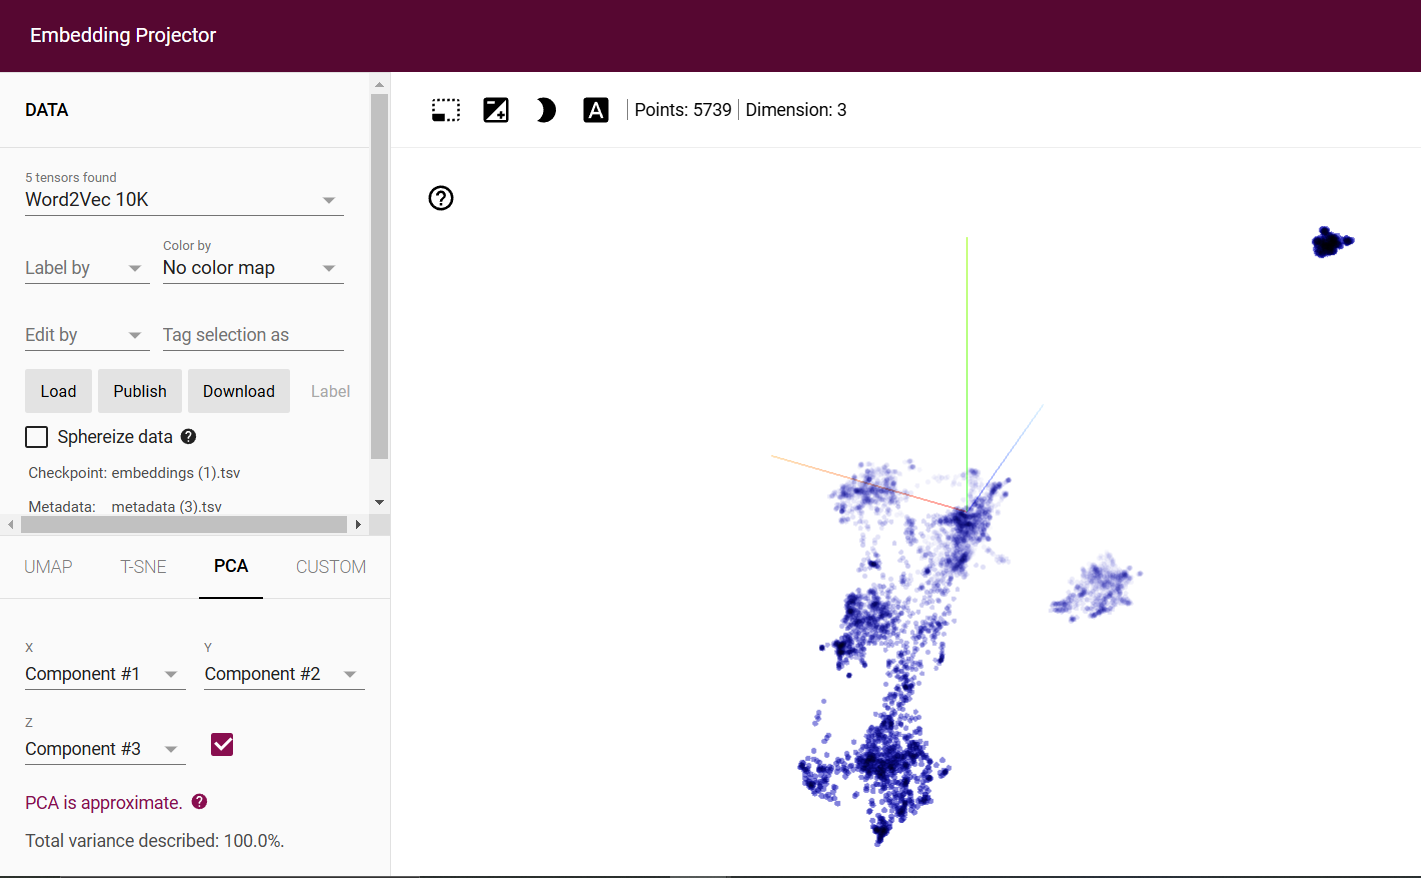